<a href="https://colab.research.google.com/github/SebasUrbina/TextAnalysisProgramaCandidatos2021/blob/main/word_cloud_presidenciales_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

https://pdftotext.com/es/

In [ ]:
import nltk
import pandas as pd
from collections import Counter
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from random import sample
import numpy as np
from PIL import Image
import cv2
import requests

!python -m spacy download es
import spacy
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
#pd.set_option(\"display.precision\", 2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     |████████████████████████████████| 16.2 MB 4.5 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=21357f94d08feea026f19d369a54bcdd963574de2bfbe6ae49e44381941c8e7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-szz3vqmo/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


Puntuación que se utilizará para filtrar el documento

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokenizer = get_tokenizer("spacy", "es") # Creamos el tokenizador de español utilizando get_gokenizer de tortch y spacy
nlp = spacy.load('es')
punctuation = string.punctuation + '\na' # Definimos la puntuación y algunas otros caracteres a filtrar
stopwords = pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt').values # Cargamos las stopwords en español

def tokenizar_texto(programa):
    assert type(programa) is str
    tokens = [] # Almacenamos los tokens luego del proceso de filtrado y limpieza
    with open(programa, encoding = 'utf-8') as f:
        lines = f.readlines()
    for line in lines:
        tokens_ = tokenizer(line)
        for token in tokens_:
            token = token.lower()
            if token not in punctuation and token not in stopwords:
                tokens.append(token)
    return tokens

#tokens = [word.lower() for word in word_tokenize(line) for line in lines if word.lower() not in punctuation]

# Funciones útiles

In [ ]:
def wordcloud(tokens, nombre, with_mask=False, mask=None, bg='black', colormap='Accent'):
    plt.rcParams['figure.figsize'] = (16,16)
    text = " ".join(tokens)

    if with_mask:
        wordcloud = WordCloud(width=1920, height=1080, background_color="white", mask=mask, colormap='Dark2',contour_color='black', contour_width=1).generate(text)
        wordcloud.to_file("word_cloud_with_mask_{}.png".format(nombre))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.figure(figsize=(20,10), facecolor='w')
        plt.show()
        #plt.savefig('wordcloud.png', facecolor='w', bbox_inches='tight')
    else:
        # Generate a word cloud image
        wordcloud = WordCloud(width = 1920, height = 1080, background_color=bg, colormap=colormap).generate(text)
        # Display the generated image:
        # the matplotlib way:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        #plt.figure( figsize=(20,10), facecolor='k')
        plt.show()
        wordcloud.to_file("word_cloud_{}.png".format(nombre))

In [ ]:
def descargar_imagen(url, name):
    assert type(url) is str and type(name) is str

    url_imagen = url # El link de la imagen
    nombre_local_imagen = name # El nombre con el que queremos guardarla
    imagen = requests.get(url_imagen).content
    with open(nombre_local_imagen, 'wb') as handler:
	    handler.write(imagen)

In [ ]:
def to_mask(img, threshold=200):
    image = cv2.imread(img)

    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # create a binary thresholded image
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY) #THRESH_BINARY_INV,THRESH_TOZERO
    # find the contours from the thresholded image
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # draw all contours
    #image2 = np.ones(image.shape)*255
    #image = cv2.drawContours(image2, contours, -1, (0, 0, 0), 3)
    # show the image with the drawn contours
    plt.imshow(mask, cmap="gray")
    plt.show()
    return mask

https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

# Gabriel Boric

Utilizamos [PDFtoText](https://pdftotext.com/es/) para convertir el programa y trabajarlo de manera más cómoda en `.txt`

In [ ]:
tokens_boric = tokenizar_texto('programa_boric.txt')

In [ ]:
print('Cantidad de tokens', len(tokens_boric))
print('Algunos tokens: ', sample(tokens_boric, 5))

Cantidad de tokens 39597
Algunos tokens:  ['despliegue', 'modelo', 'aliado', 'articulando', 'correspondientes']


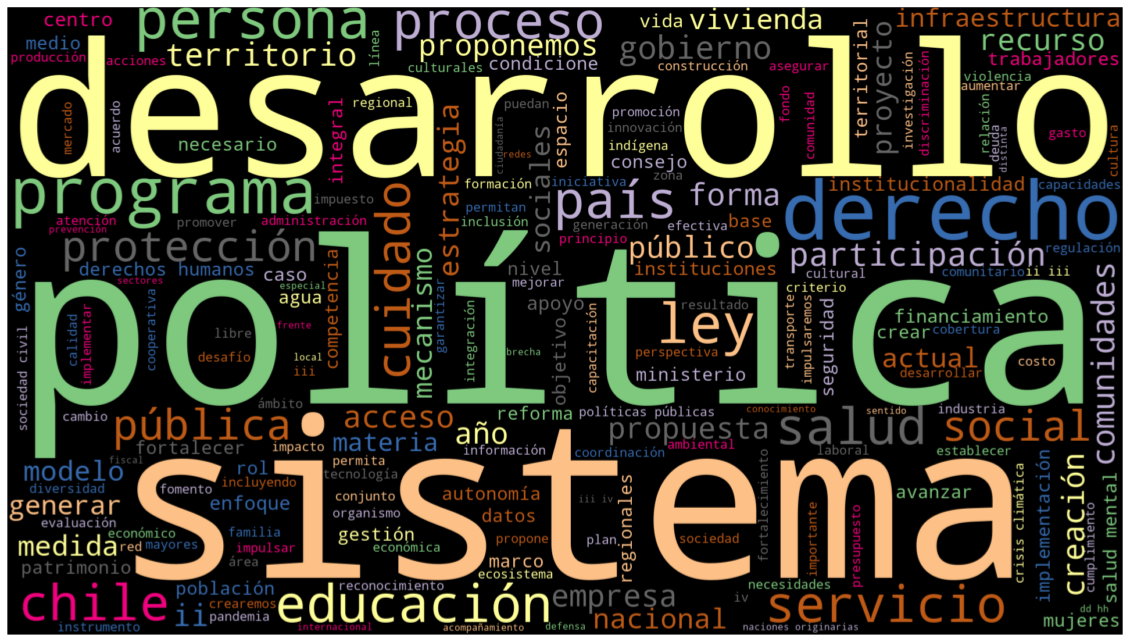

In [ ]:
wordcloud(tokens_boric, 'boric')

Referencia imagen: https://www.epicentrochile.com/2021/06/22/boric-asegura-que-con-daniel-jadue-tocaran-temas-novedosos-en-debate-presidencial/

In [ ]:
descargar_imagen('https://www.concierto.cl/wp-content/uploads/2021/07/Gabriel-Boric.jpg','boric.jpg')

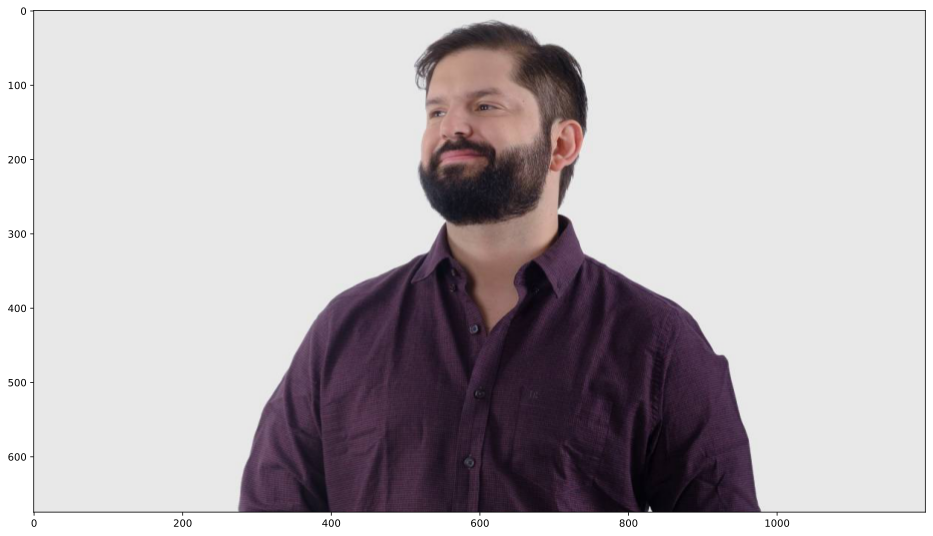

In [ ]:
boric_img = np.array(Image.open('boric.jpg'))
plt.imshow(boric_img)

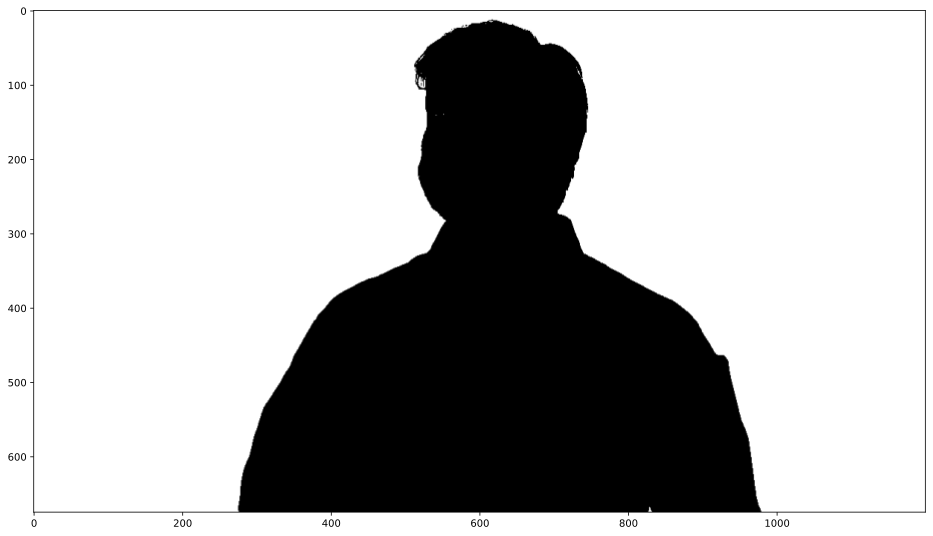

In [ ]:
boric_mask = to_mask('boric.jpg')

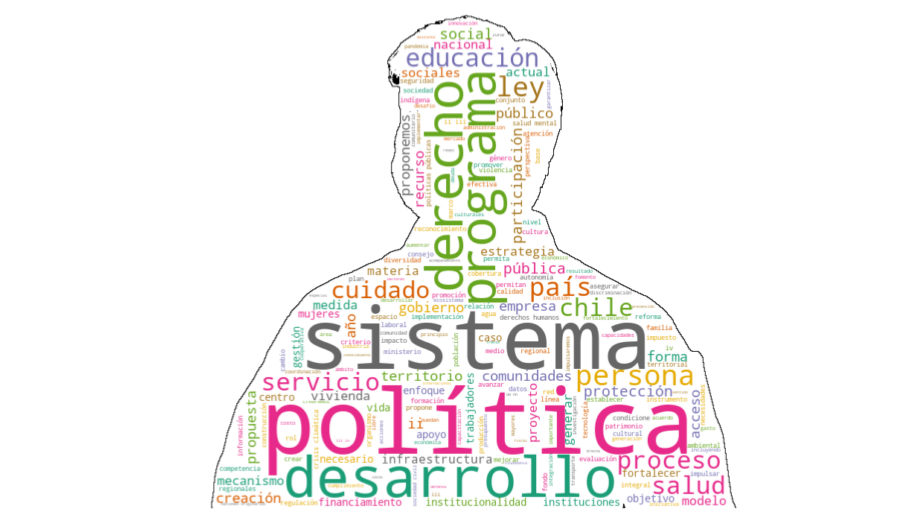

<Figure size 1440x720 with 0 Axes>

In [ ]:
wordcloud(tokens_boric,'boric',with_mask=True,mask=boric_mask,colormap='Dark2')

# Sebastián Sichel

Programa: https://www.servel.cl/wp-content/uploads/2021/06/3_PROGRAMA_SEBASTIAN_SICHEL.pdf

In [ ]:
tokens_sichel = tokenizar_texto('programa_sichel.txt')
print('Cantidad de tokens', len(tokens_sichel))
print('Algunos tokens: ', sample(tokens_sichel, 5))

Cantidad de tokens 11911
Algunos tokens:  ['documento', 'implica', 'necesario', 'producto', 'crecimiento']


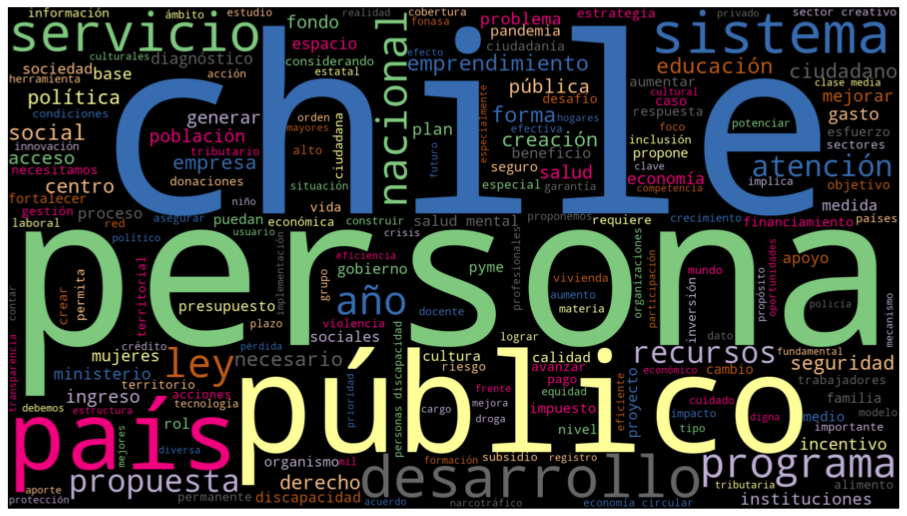

In [ ]:
wordcloud(tokens_sichel,'sichel')

In [ ]:
descargar_imagen('https://upload.wikimedia.org/wikipedia/commons/5/5f/Sebasti%C3%A1n_Sichel.jpg','sichel.jpg')

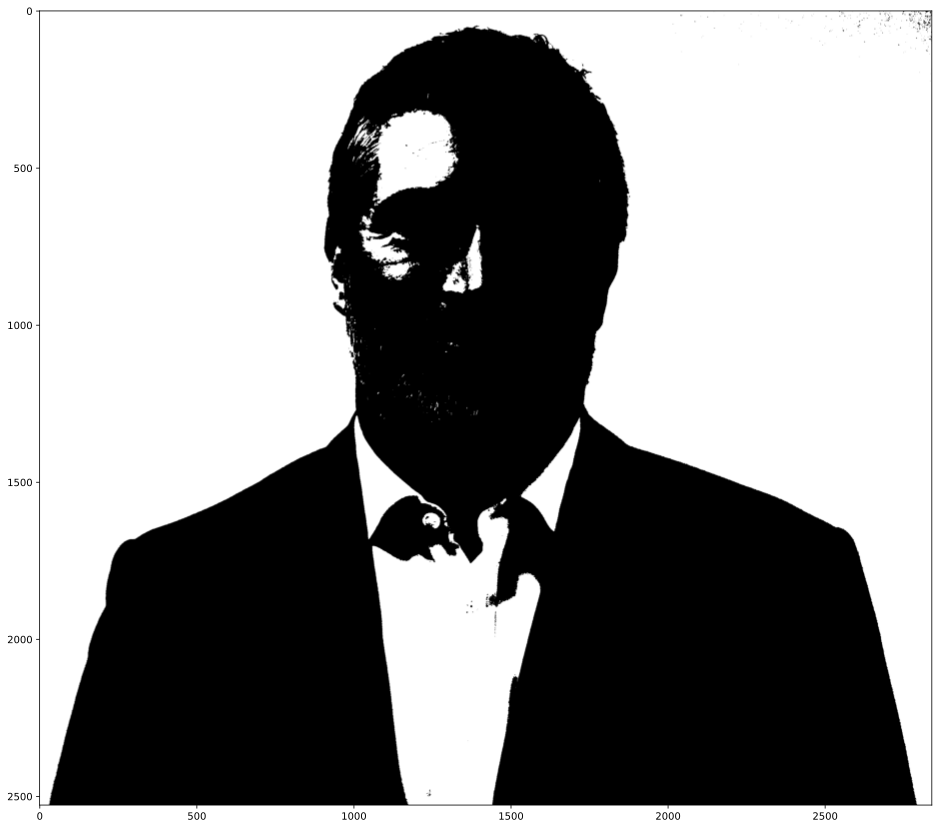

In [ ]:
mask_sichel = to_mask('sichel.jpg', threshold=215)

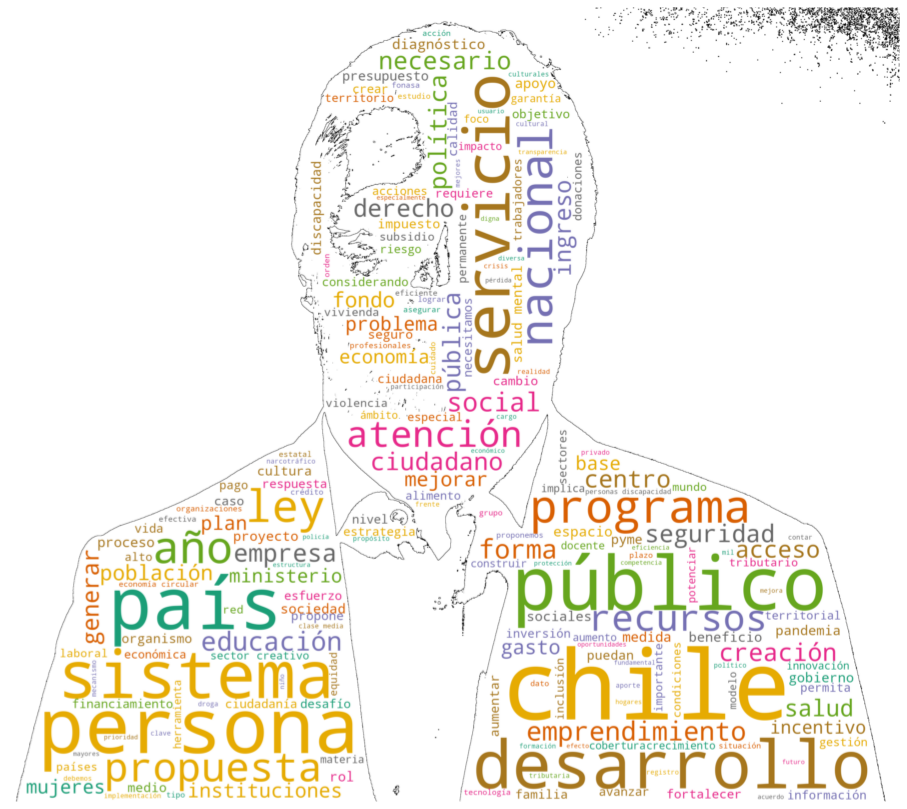

<Figure size 1440x720 with 0 Axes>

In [ ]:
wordcloud(tokens_sichel, 'sichel', with_mask=True, mask=mask_sichel)

# José Antonio Kast

Programa: https://www.servel.cl/wp-content/uploads/2017/09/Programa_Jose_Antonio_Kast_Rist.pdf

In [ ]:
tokens_kast = tokenizar_texto('programa_kast.txt')

In [ ]:
print('Cantidad de tokens', len(tokens_kast))
print('Algunos tokens: ', sample(tokens_kast, 5))

Cantidad de tokens 8889
Algunos tokens:  ['rendición', 'negativos', 'hospitalizados', '\x0c', 'establece']


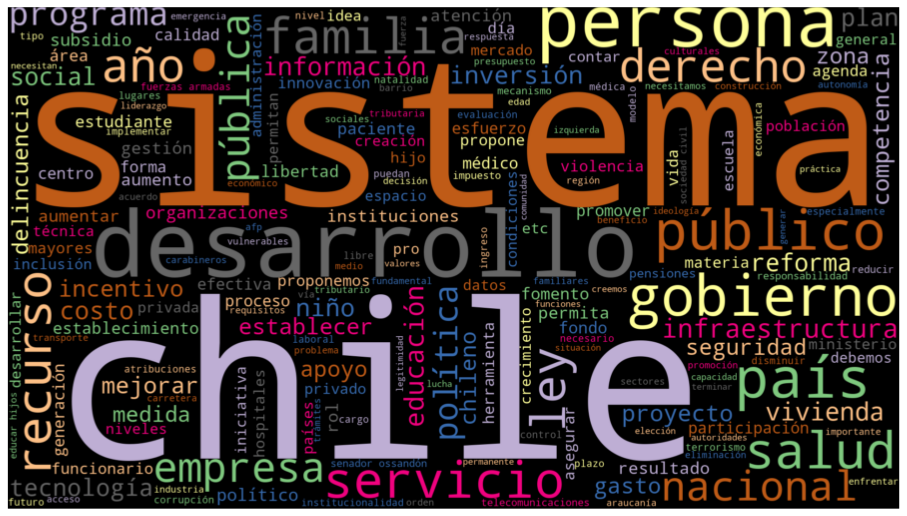

In [ ]:
wordcloud(tokens_kast,'kast')

In [ ]:
descargar_imagen('https://www.publico.es/files/article_main/files/crop/uploads/2019/01/19/5c42e9cdd9976..0-0-1344-692.jpg','kast.jpg')

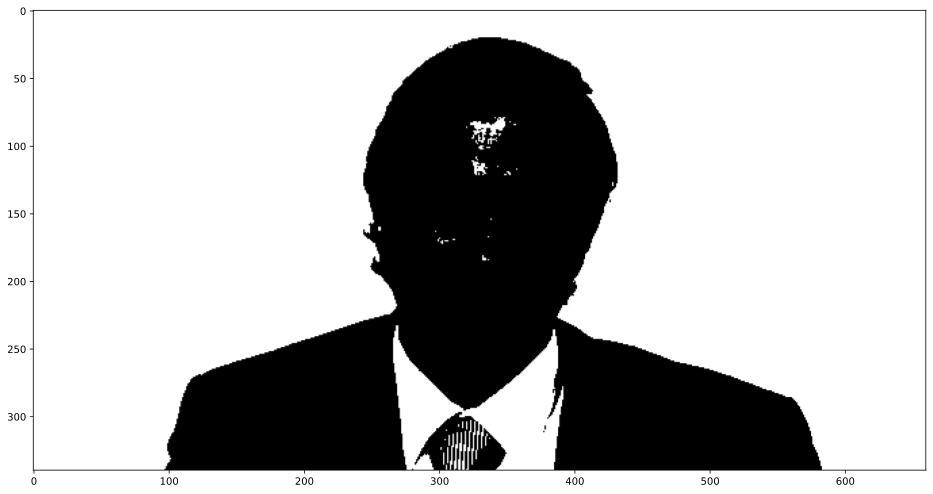

In [ ]:
mask_kast = to_mask('kast.jpg', threshold=160)

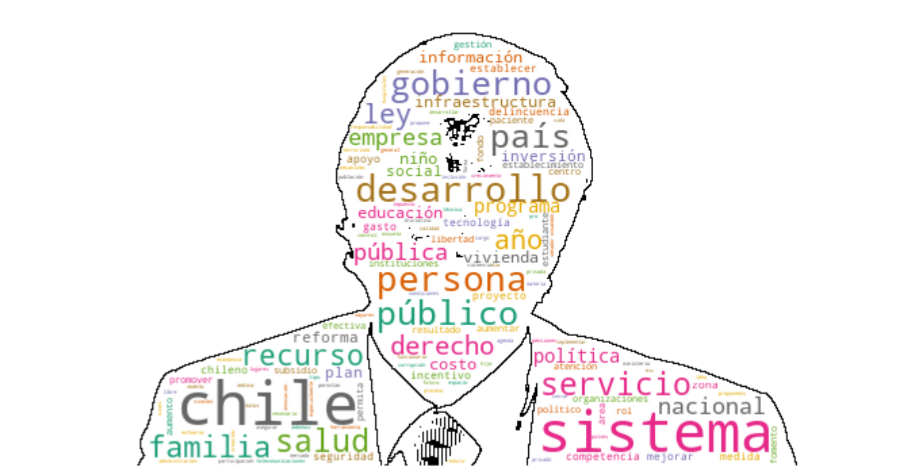

<Figure size 1440x720 with 0 Axes>

In [ ]:
wordcloud(tokens_kast,'kast', with_mask=True,mask=mask_kast)